# Udacity Data Analyst Nanodegree
# P2: Analysis of the relative age effect in the american baseball

Author: Luiz Gerosa

Date: Feb 15, 2017

## Introduction

Within many sports, the youth stages of participation are often organized into annual age-groups using specific cutoff dates. Although the intention of providing a fair play for youngsters with similar age, in some sports can be observed a higher chance of participation in the professional level amongst those born early in the selection period. This phenomenon is known as [Relative Age Effect](https://en.wikipedia.org/wiki/Relative_age_effect) (RAE).

The first major study of this effect was published in the Journal of the Canadian Association for Health, Physical Education, and Recreation in 1985 by Barnsley et al. This study determined that NHL players of the early 1980s were more than four times as likely to be born in the first three months of the calendar year as the last three months.

Malcolm Gladwell explains this effect in his book [Outliers: The Story of Success](http://gladwell.com/outliers/):

>The explanation for this is quite simple. It has nothing to do with astrology, nor is there anything magical about the first three months of the year. It’s simply that in Canada the eligibility cutoff for age-class hockey is January 1. A boy who turns ten on January 2, then, could be playing alongside someone who doesn’t turn ten until the end of the year — and at that age, in preadolescence, a twelvemonth gap in age represents an enormous difference in physical maturity.

>This being Canada, the most hockey-crazed country on earth, coaches start to select players for the traveling “rep” squad — the all-star teams — at the age of nine or ten, and of course they are more likely to view as talented the bigger and more coordinated players, who have had the benefit of critical extra months of maturity.

>And what happens when a player gets chosen for a rep squad? He gets better coaching, and his teammates are better, and he plays fifty or seventy-five games a season instead of twenty games a season like those left behind in the “house” league, and he practices twice as much as, or even three times more than, he would have otherwise. In the beginning, his advantage isn’t so much that he is inherently better but only that he is a little older. But by the age of thirteen or fourteen, with the benefit of better coaching and all that extra practice under his belt, he really is better, so he’s the one more likely to make it to the Major Junior A league, and from there into the big leagues.

>Barnsley argues that these kinds of skewed age distributions exist whenever three things happen: selection, streaming, and differentiated experience. If you make a decision about who is good and who is not good at an early age; if you separate the “talented” from the “untalented”; and if you provide the “talented” with a superior experience, then you’re going to end up giving a huge advantage to that small group of people born closest to the cutoff date.

In 1991, Thompson et al. observed a similar effect in the American Baseball. For many years, July 31 was the cutoff date used by virtually all nonschool baseball leagues in the United States. This caused an unfair advantage for players born in August compared to players born in July.

The goal of this analysis is to observe if this effect is still relevant nowadays.

## Questions

* How does the month of birth correlate with the participation rate in the professional leagues?
* Does the month of birth correlate with the professional player performance, i.e., the unfair advantage of those who have been born earlier in baseball year remains relevant after they became a pro?

## Data Wrangle

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Creating auxilary series for month names 
monthNames = pd.Series(
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    , index=range(1,13))

relativeMonthNames = pd.Series(
     ['Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul'])

# Auxiliary functions
def normalizeValues(s):
    '''returns the proportion of each value in relation to the sum of all values.'''
    return s / s.sum()
    

### General population data
The general population natality birth data comes from the [Center of Disease Control and Prevention](http://www.nber.org/data/vital-statistics-natality-data.html) (CDC). The total number of births per month was collected from 1994 to 2002 and will be used as a proxy for the birth rate per month of the general population.

In [3]:
generalBirths = pd.read_csv('datasets/us_births_by_month.csv')
generalBirths.head()

,Year,Month,Births
0,1994,1,320705
1,1994,2,301327
2,1994,3,339736
3,1994,4,317392
4,1994,5,330295


The chart below shows the mean number of births for each month of the year of the general population. As could be observed, there is a slight increase of births over the summer (July to September) and a decrease in February.

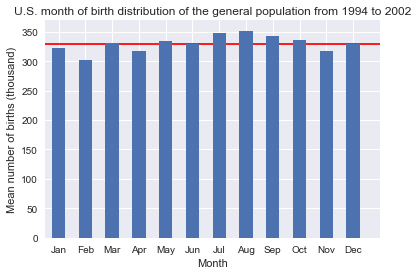

In [4]:
generalBirthsByMonth = generalBirths.groupby('Month').mean()['Births'] / 1000

# plot a line with the mean births per year
meanBirths = generalBirthsByMonth.sum() / len(generalBirthsByMonth)
plt.axhline(meanBirths, color='red', zorder=1)

# plot the distribution of births per months
generalBirthsByMonth.plot(kind='bar', zorder=2)
plt.xticks(range(13), monthNames, rotation=0)
plt.ylabel('Mean number of births (thousand)')
plt.title('U.S. month of birth distribution of the general population from 1994 to 2002')

### Baseball players data
The data for this analysis comes from the 2015 edition of [The Lahman Baseball Database](http://www.seanlahman.com/baseball-archive/statistics/) that contains complete batting and pitching statistics from 1871 to 2015, plus fielding statistics, standings, team stats, managerial records, post-season data, and more. 

The following tables will be used in this analysis:
* Master: the master table contains player names, DOB, and biographical info
* Batting: batting statistics


In [5]:
master = pd.read_csv('datasets/core/Master.csv')
print(master.columns)
master.head()

Index(['playerID', 'birthYear', 'birthMonth', 'birthDay', 'birthCountry',
       'birthState', 'birthCity', 'deathYear', 'deathMonth', 'deathDay',
       'deathCountry', 'deathState', 'deathCity', 'nameFirst', 'nameLast',
       'nameGiven', 'weight', 'height', 'bats', 'throws', 'debut', 'finalGame',
       'retroID', 'bbrefID'],
      dtype='object')


,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,Aardsma,David Allan,220.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,...,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,...,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,...,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,...,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01


In [6]:
batting = batting = pd.read_csv('datasets/core/Batting.csv')

# replace NaN with 0 so the batting stats can be used to calculate performance measures
batting = batting.fillna(value=0)
batting.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,0,1,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,addybo01,1871,1,RC1,0,25,118.0,30.0,32.0,6.0,...,13.0,8.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
2,allisar01,1871,1,CL1,0,29,137.0,28.0,40.0,4.0,...,19.0,3.0,1.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0
3,allisdo01,1871,1,WS3,0,27,133.0,28.0,44.0,10.0,...,27.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
4,ansonca01,1871,1,RC1,0,25,120.0,29.0,39.0,11.0,...,16.0,6.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0


## Baseball players relative age effect
The chart below shows the month of birth distribution of baseball players in the database.

Players born in May, June or July: 4254
Players born in August, Septermber or October: 5184
Increase: 21.86%


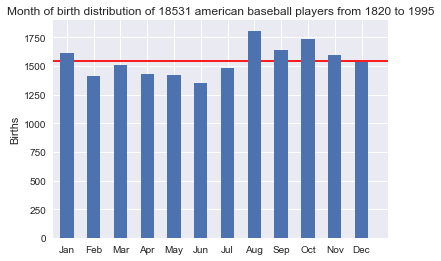

In [7]:
playerBirthsByMonth = master['birthMonth'].value_counts().sort_index()
minYear = master['birthYear'].min()
maxYear = master['birthYear'].max()
total = playerBirthsByMonth.sum()

# plot a line indicating birth in a uniformly distribution
meanBirths = total / 12
plt.axhline(meanBirths, color='red', zorder=1)

# plot the distribution of births per months
playerBirthsByMonth.plot(kind='bar', zorder=2)
plt.xticks(range(13), monthNames, rotation=0)
plt.ylabel('Births')
plt.title('Month of birth distribution of {} american baseball players from {:4.0f} to {:4.0f}'.format(total, minYear, maxYear))

birthsBefore = playerBirthsByMonth.loc[5:7].sum()
birthsAfter = playerBirthsByMonth.loc[8:10].sum()
print('Players born in May, June or July: {}'.format(birthsBefore))
print('Players born in August, Septermber or October: {}'.format(birthsAfter))
print('Increase: {:4.2f}%'.format((birthsAfter - birthsBefore) / birthsBefore * 100))


This chart shows a tendency for professional baseball players to have been born early in the baseball year (starting in August and ending in July). For instance, there are 21.86% more players that have been born in August, September, and October than have been born in May, June, and July.

Although the chart is important to observe this tendency, it's necessary measuring it. In order to measure the impact of the RAE in baseball players, the following steps were executed:
1. Calculate the relative month for the baseball players and for the general population. The relative month measures how many months after August (the first month of the baseball year) the month of birth is.
2. Calculate the birth rate for each relative month for the general population and for the baseball players.
3. Calculate the deviations between the baseball players and the general population birth rates.
4. Calculate the correlation coefficient between the deviations of birth rates and the relative months.

### 1. Relative month

In [8]:
# The relative month is calculated rotating left the month of birth by 8.

# master dataframe
master = master.assign(relativeMonth = (master.birthMonth - 8) % 12)

# general population dataframe
generalBirths = generalBirths.assign(relativeMonth = (generalBirths.Month - 8) % 12)
generalBirths.head(n = 12)

,Year,Month,Births,relativeMonth
0,1994,1,320705,5
1,1994,2,301327,6
2,1994,3,339736,7
3,1994,4,317392,8
4,1994,5,330295,9
5,1994,6,329737,10
6,1994,7,345862,11
7,1994,8,352173,0
8,1994,9,339223,1
9,1994,10,330172,2


### 2. Birth rate per relative month

In [9]:
generalMeanBirthsByRelativeMonth = generalBirths.groupby('relativeMonth').mean()['Births']
generalBirthRatesByRelativeMonth = normalizeValues(generalMeanBirthsByRelativeMonth)

playersBirthRatesByRelativeMonth = master['relativeMonth'].value_counts(normalize=True).sort_index()

In the chart below could be observed that the birth rates of baseball players are higher in the first months of the baseball year and lower in the last months.

([<matplotlib.axis.XTick at 0x11a948ac8>,
 <a list of 12 Text xticklabel objects>)

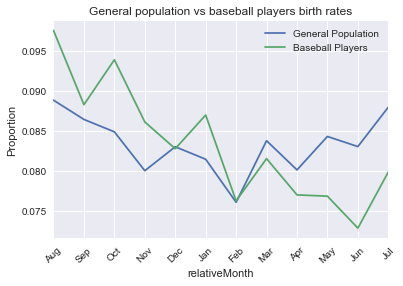

In [10]:
generalBirthRatesByRelativeMonth.plot(label='General Population')
playersBirthRatesByRelativeMonth.plot(label='Baseball Players')

plt.legend()
plt.ylabel('Proportion')
plt.title('General population vs baseball players birth rates')
plt.xticks(range(12), relativeMonthNames, rotation=45)


### 3. Deviations between birth rates
The deviations between birth rates is calculated subtracting the baseball players birth rate distribution from the general population birth rate distribution.

([<matplotlib.axis.XTick at 0x11ad02828>,
 <a list of 12 Text xticklabel objects>)

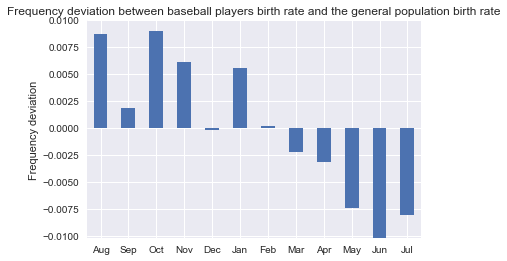

In [11]:
deviations = playersBirthRatesByRelativeMonth - generalBirthRatesByRelativeMonth
deviations.plot(kind='bar')
plt.ylabel('Frequency deviation')
plt.title('Frequency deviation between baseball players birth rate and the general population birth rate')
plt.xticks(range(12), relativeMonthNames, rotation=0)

### 4. Correlation coefficient

In [12]:
r = numpy.corrcoef(deviations, range(12))[0,1]
print('r = {}'.format(r))

r = -0.9005334024855879


## Month of birth vs player performance
In order to correlate the month of birth with the player performance, the following steps were be executed:
1. Calculate the [On-base percentage]('https://en.wikipedia.org/wiki/On-base_percentage') (OBP), that is a traditional batting performance measurement.
2. Calculate the mean OBP per relative month
3. Normalize the mean OBP per relative month
4. Plot the results and observe if there is a correlation

In [13]:
#On Base Percentage = (H + BB + HBP)/ (AB + BB + HBP + SF)
batting = batting.assign(OBP = (batting.H + batting.BB +batting.HBP)/(batting.AB + batting.BB + batting.HBP + batting.SF))

meanOBPByMonth = batting.merge(master, on='playerID').groupby('relativeMonth').mean()['OBP']
meanOBPFrequencyByMonth = normalizeValues(meanOBPByMonth)

([<matplotlib.axis.XTick at 0x11addd2e8>,
 <a list of 12 Text xticklabel objects>)

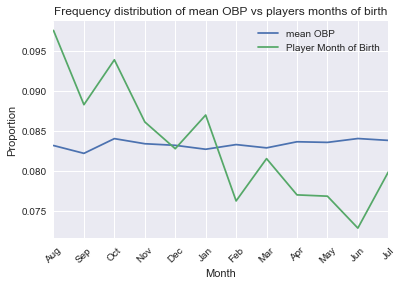

In [14]:
meanOBPFrequencyByMonth.plot(label='mean OBP')
playersBirthRatesByRelativeMonth.plot(label='Player Month of Birth')

plt.legend()
plt.xlabel('Month')
plt.ylabel('Proportion')
plt.title('Frequency distribution of mean OBP vs players months of birth')
plt.xticks(range(12), relativeMonthNames, rotation=45)

As could be observed in the chart above, the mean OBP is uniformly distributed over the months of the year.

## Conclusions
The results of this analysis provide strong support that there is a significant tendency for professional baseball players to have been born early in the baseball year (starting in August and ending in July). In order to measure the impact of the Relative Age Effect, the correlation coefficient between the relative month of birth and the deviation of players birth rates from the general population birth rates was calculated.

The correlation coefficient obtained was -0.9, meaning a strong negative linear relationship, i.e, as far the month of birth is from August, less chance to participate in the professional league the player has. We can conclude that it appears that a significant number of budding baseball players are prevented from reaching their potential because of an accident of birth.

On the other hand, there is no correlation between the month of birth and the player performance. The unfair advantage of those who have been born earlier in the baseball year didn't remain relevant after they became a pro.

## References
http://www.nber.org/data/vital-statistics-natality-data.html

http://www.slate.com/articles/sports/sports_nut/2008/04/the_boys_of_late_summer.html

https://en.wikipedia.org/wiki/Relative_age_effect

http://gladwell.com/outliers/

https://en.wikipedia.org/wiki/On-base_percentage

http://www.seanlahman.com/baseball-archive/statistics/

Thompson A, Barnsley R, Stebelsky G. ‘Born to play ball’:
the relative age effect and major league baseball. Sociol
Sport J 1991; 8: 146-51


